In [125]:
#Importing required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from random import randrange, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score,silhouette_score
%matplotlib inline

In [2]:
#Changing working directory
os.chdir("D:\Edwisor Data Science\Final Project 3 Submission")

In [3]:
#Check working directory
os.getcwd()

'D:\\Edwisor Data Science\\Final Project 3 Submission'

# Importing and Checking Data

In [4]:
#Importing dataset
df_credit_card = pd.read_csv("credit-card-data.csv")

In [5]:
#Checking no of observations and variables
df_credit_card.shape

(8950, 18)

In [6]:
#Checking top 5 rows of dataset to get an idea about the dataset
df_credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#Checking the info of our dataset
df_credit_card.info()
#So we can see that 
# CREDIT_LIMIT
# MINIMUM_PAYMENTS
# have missing values we will impute them in EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
#Describing details of our dataset
df_credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
#Checking missing entries in CREDIT_LIMIT variable
df_credit_card[df_credit_card['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
#Checking missing entries in CREDIT_LIMIT variable
df_credit_card[df_credit_card['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


# Exploratory Data Analysis 
# 1. Missing Value Analysis

In [10]:
#Missing Value Analysis
missing_val = pd.DataFrame(df_credit_card.isnull().sum())

In [11]:
missing_val[missing_val[0] > 0]
# We can see 2 variables have missing values lets impute them 

,0
CREDIT_LIMIT,1
MINIMUM_PAYMENTS,313


In [26]:
# Setting noted values as null values 
print(df_credit_card['CREDIT_LIMIT'].loc[20])
print(df_credit_card['MINIMUM_PAYMENTS'].loc[20])

2000.0
13557.29726


In [13]:
# Setting noted values as null values 
df_credit_card['CREDIT_LIMIT'].loc[20] = np.nan
#df_credit_card['CREDIT_LIMIT'].loc[50] = np.nan
df_credit_card['MINIMUM_PAYMENTS'].loc[20] = np.nan
#df_credit_card['MINIMUM_PAYMENTS'].loc[50] = np.nan

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
# Setting noted values as null values 
print(df_credit_card['CREDIT_LIMIT'].loc[20])
print(df_credit_card['MINIMUM_PAYMENTS'].loc[20])

4494.728222095775
862.7367541256359


In [16]:
#Let's Create a backup copy of main dataset
df_credit_bkp = df_credit_card.copy()

In [17]:
#Lets Impute the data with mean values
df_credit_card['CREDIT_LIMIT'] = df_credit_card['CREDIT_LIMIT'].fillna(df_credit_card['CREDIT_LIMIT'].mean())
print(df_credit_card['CREDIT_LIMIT'].loc[5203])

4494.728222095775


In [42]:
#Lets Impute the data with median values
df_credit_card['CREDIT_LIMIT'] = df_credit_card['CREDIT_LIMIT'].fillna(df_credit_card['CREDIT_LIMIT'].median())
print(df_credit_card['CREDIT_LIMIT'].loc[5203])

3000.0
3000.0
3000.0


In [18]:
# Checking imputed missing value
df_credit_card[df_credit_card['CREDIT_LIMIT'].isnull()]
print(df_credit_card['CREDIT_LIMIT'].loc[5203])

4494.728222095775


Since Mean values seems to be more closer with the actual values we checked so we imputed missing value using mean()

In [19]:
#Lets Impute the data with mean values
df_credit_card['MINIMUM_PAYMENTS'] = df_credit_card['MINIMUM_PAYMENTS'].fillna(df_credit_card['MINIMUM_PAYMENTS'].mean())
print(df_credit_card['MINIMUM_PAYMENTS'].loc[20])
print(df_credit_card['MINIMUM_PAYMENTS'].loc[50])

862.7367541256359
1012.4159609999999


In [20]:
#Lets Impute the data with median values
df_credit_card['MINIMUM_PAYMENTS'] = df_credit_card['MINIMUM_PAYMENTS'].fillna(df_credit_card['MINIMUM_PAYMENTS'].median())
print(df_credit_card['MINIMUM_PAYMENTS'].loc[20])
print(df_credit_card['MINIMUM_PAYMENTS'].loc[50])

862.7367541256359
1012.4159609999999


In [25]:
# Restoring original values after checking data
df_credit_card['CREDIT_LIMIT'].loc[20] = 2000.0
df_credit_card['MINIMUM_PAYMENTS'].loc[20] = 13557.29726

In [71]:
#Let's Create a backup copy of main dataset
df_credit_card = df_credit_bkp.copy()

In [27]:
# Missing Value Analysis Check after Imputing using mean()
missing_val = pd.DataFrame(df_credit_card.isnull().sum())
missing_val

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [29]:
# I have noticed that 1 there are 65 customers who have balance but they have not made any payments 
# so there Minimum payments should be 0 as well. Updating it manually

df_credit_card.to_csv("KPI_Outputs_v1.csv", index = False)

df_credit_card = pd.read_csv("KPI_Outputs_v1.csv")

# Deriving Intelligent KPIs from Customer Data

##### Monthly Average Purchase and Cash Advance Amount

In [30]:
# Monthly Average Purchase
df_credit_card['Monthly_Avg_Purchase'] = df_credit_card['PURCHASES'] / df_credit_card['TENURE']
df_credit_card['Monthly_Avg_Purchase'] = df_credit_card['Monthly_Avg_Purchase'].replace(np.nan, 0)

In [31]:
df_credit_card['Monthly_Avg_Purchase'].head(5)

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

In [32]:
# Monthly Cash Advances
df_credit_card['Monthly_Cash_Adv'] = df_credit_card['CASH_ADVANCE'] / df_credit_card['TENURE']
df_credit_card['Monthly_Cash_Adv'] = df_credit_card['Monthly_Cash_Adv'].replace(np.nan, 0)

In [33]:
df_credit_card['Monthly_Cash_Adv'].head(5)

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_Cash_Adv, dtype: float64

##### Customer Purchase Habits

In [34]:
# Purchases by type
def Purchase(df_credit_card):
    if(df_credit_card['ONEOFF_PURCHASES'] == 0) & (df_credit_card['INSTALLMENTS_PURCHASES'] == 0):
        return "No Purchases"
    if(df_credit_card['ONEOFF_PURCHASES'] > 0) & (df_credit_card['INSTALLMENTS_PURCHASES'] == 0):
        return "One Off Purchases"
    if(df_credit_card['ONEOFF_PURCHASES'] == 0) & (df_credit_card['INSTALLMENTS_PURCHASES'] > 0):
        return "Installment Purchases"
    if(df_credit_card['ONEOFF_PURCHASES'] > 0) & (df_credit_card['INSTALLMENTS_PURCHASES'] > 0):
        return "Both Purchases"

In [35]:
df_credit_card['Purchase_Type'] = df_credit_card.apply(Purchase, axis =1)

In [36]:
df_credit_card['Purchase_Type'].value_counts()

Both Purchases           2774
Installment Purchases    2260
No Purchases             2042
One Off Purchases        1874
Name: Purchase_Type, dtype: int64

##### Average Amount Per Purchase

In [37]:
# Average Amount per purchase
df_credit_card['Average_Purchase_Size'] = df_credit_card['PURCHASES'] / df_credit_card['PURCHASES_TRX']
df_credit_card['Average_Purchase_Size'] = df_credit_card['Average_Purchase_Size'].replace([np.inf, -np.inf], np.nan)
df_credit_card['Average_Purchase_Size'] = df_credit_card['Average_Purchase_Size'].replace(np.nan, 0)

In [38]:
df_credit_card['Average_Purchase_Size'].head()

0      47.700000
1       0.000000
2      64.430833
3    1499.000000
4      16.000000
Name: Average_Purchase_Size, dtype: float64

##### Cash Advance Transaction

In [39]:
# Cash Advance Transaction
df_credit_card['Cash_Adv_Trx'] = df_credit_card['CASH_ADVANCE'] / df_credit_card['CASH_ADVANCE_TRX']
df_credit_card['Cash_Adv_Trx'] = df_credit_card['Cash_Adv_Trx'].replace(np.nan, 0)

In [40]:
df_credit_card['Cash_Adv_Trx'].head()

0       0.000000
1    1610.736371
2       0.000000
3     205.788017
4       0.000000
Name: Cash_Adv_Trx, dtype: float64

##### Limit Usage (Balance to Credit Limit Ratio)

In [41]:
df_credit_card['Limit_Usage'] = df_credit_card['BALANCE'] / df_credit_card['CREDIT_LIMIT'] * 100

In [42]:
df_credit_card['Limit_Usage'].head()

0     4.090075
1    45.749535
2    33.268651
3    22.222274
4    68.142861
Name: Limit_Usage, dtype: float64

##### Payments To Minimum Payments Ratio

In [43]:
df_credit_card['Min_Payment_Ratio'] = df_credit_card['PAYMENTS'] / df_credit_card['MINIMUM_PAYMENTS']*100
df_credit_card['Min_Payment_Ratio'] = df_credit_card['Min_Payment_Ratio'].replace([np.inf, -np.inf], np.nan)
df_credit_card['Min_Payment_Ratio'] = df_credit_card['Min_Payment_Ratio'].replace(np.nan, 0)

In [44]:
df_credit_card['Min_Payment_Ratio'].head()

0    144.650844
1    382.624146
2     99.168154
3      0.000000
4    277.107453
Name: Min_Payment_Ratio, dtype: float64

# Insights from New Derived KPIs

In [45]:
# Exporting Data
df_credit_card.to_csv("KPI_Outputs_v1.csv", index = False)

In [46]:
# Average payment_minpayment ratio for each purchse type.
x=df_credit_card.groupby('Purchase_Type').apply(lambda x: np.mean(x['Min_Payment_Ratio']))
type(x)
x.values
#1 off: 146.5938805
#None: 285.1278022
#Installment: 215.6546286
#Both: 71.43929405

array([ 723.11819038, 1324.50875461, 1007.67115094,  549.82067181])

##### Insight 1: 46% customers are doing any one type of Purchase (One off or Installment Purchase), while 31 % are doing both and 23% are doing no purchases.

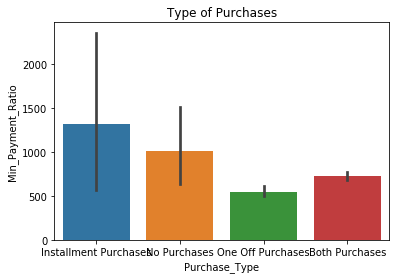

In [47]:
sns.barplot(x = 'Purchase_Type', y = 'Min_Payment_Ratio', data = df_credit_card, label = True)
plt.title('Type of Purchases')
plt.show()

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

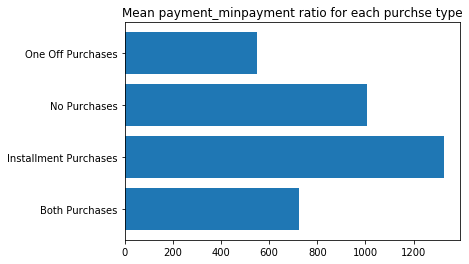

In [48]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

##### Insight 2: Customers taking Installments are making minimum payments various those who are not doing one off purchase and installment purchase are taking cash advances and making minimum payments

Text(0.5, 1.0, 'Average Cash Advance Taken by Customers')

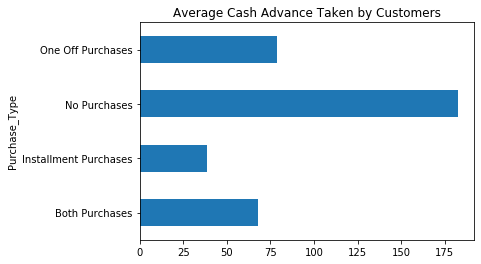

In [49]:
df_credit_card.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_Cash_Adv'])).plot.barh()

plt.title('Average Cash Advance Taken by Customers')

##### Insight 3: Customers doing no transactions are taking more cash advances

##### Insight 4: Customers who have done atleast 25 transactions have done atleast 1 Cash Advance Transaction

# 2. Outlier Analysis

In [50]:
cnames = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
          'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
          'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

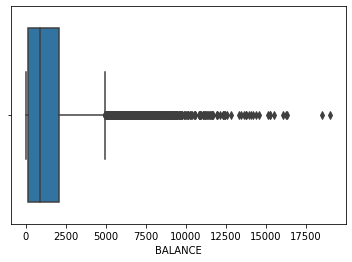

In [51]:
sns.boxplot(df_credit_card['BALANCE'])
#BALANCE
#BALANCE_FREQUENCY
#ONEOFF_PURCHASES_FREQUENCY
#CASH_ADVANCE_FREQUENCY
#PAYMENTS
#MINIMUM_PAYMENTS
#PRC_FULL_PAYMENT
#TENURE

In [52]:
#Creating data backup
df_credit_card_bkp = df_credit_card.copy()

In [53]:
outliers = []
def detect_outliers(data):
    threshold =3
    mean = np.mean(data)
    std = np.mean(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
        return outliers

In [54]:
outlier_pt = detect_outliers(df_credit_card['BALANCE_FREQUENCY'])

In [55]:
outlier_pt

[]

In [56]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df_credit_card.loc[:,i],[75,25])
    iqr = q75 -q25
    
    print("Q75 :", q75)
    print("Q25 :", q25)
    print("IQR :", iqr)
    min1 = q25 - (iqr * 1.5)
    max1 = q75 + (iqr * 1.5)
    print("Min :", min1)
    print("Max :", max1)
    
    #df_cor = df_cor.drop((df_cor[df_cor.loc[:,i] < min].index))
    #df_cor = df_cor.drop((df_cor[df_cor.loc[:,i] > max].index))

BALANCE
Q75 : 2054.1400355
Q25 : 128.2819155
IQR : 1925.85812
Min : -2760.5052645
Max : 4942.9272155
BALANCE_FREQUENCY
Q75 : 1.0
Q25 : 0.8888889999999999
IQR : 0.11111100000000007
Min : 0.7222224999999998
Max : 1.1666665
PURCHASES
Q75 : 1110.13
Q25 : 39.635
IQR : 1070.4950000000001
Min : -1566.1075000000003
Max : 2715.8725000000004
ONEOFF_PURCHASES
Q75 : 577.4050000000001
Q25 : 0.0
IQR : 577.4050000000001
Min : -866.1075000000001
Max : 1443.5125000000003
INSTALLMENTS_PURCHASES
Q75 : 468.63749999999993
Q25 : 0.0
IQR : 468.63749999999993
Min : -702.95625
Max : 1171.59375
CASH_ADVANCE
Q75 : 1113.8211392499998
Q25 : 0.0
IQR : 1113.8211392499998
Min : -1670.7317088749996
Max : 2784.5528481249994
PURCHASES_FREQUENCY
Q75 : 0.916667
Q25 : 0.083333
IQR : 0.833334
Min : -1.166668
Max : 2.166668
ONEOFF_PURCHASES_FREQUENCY
Q75 : 0.3
Q25 : 0.0
IQR : 0.3
Min : -0.44999999999999996
Max : 0.75
PURCHASES_INSTALLMENTS_FREQUENCY
Q75 : 0.75
Q25 : 0.0
IQR : 0.75
Min : -1.125
Max : 1.875
CASH_ADVANCE_FREQUE

In [57]:
df_credit_card = df_credit_card.drop(['BALANCE_log'], axis =1)

KeyError: "['BALANCE_log'] not found in axis"

In [58]:
# log tranformation
cr_log=df_credit_card.drop(['CUST_ID','Purchase_Type'],axis=1).applymap(lambda x: np.log(x+1))

In [59]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Adv,Average_Purchase_Size,Cash_Adv_Trx,Limit_Usage,Min_Payment_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,6.624540,5.770232,0.117730,2.519680,3.050877,2.163970,3.149057,2.648058,2.935285,5.353352
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.591763,1.513586,0.211617,0.130367,2.002823,2.429741,1.883532,2.841407,1.488984,1.580305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,5.951361,5.109899,0.000000,2.564949,1.481458,0.000000,2.563674,0.000000,1.638878,4.518851
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,6.754489,5.706859,0.000000,2.564949,3.494587,0.000000,3.747005,0.000000,3.442724,5.311840
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,7.550732,6.709443,0.133531,2.564949,4.587295,4.606022,4.377796,5.513409,4.287127,6.406753
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,8.696622,9.604910,7.372743,13.435792


In [60]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [384]:
cr_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Adv,Average_Purchase_Size,Cash_Adv_Trx,Limit_Usage,Min_Payment_Ratio
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,3.885679,0.000000,1.627293,4.981212
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.000000,7.385067,3.844804,5.949663
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,4.180994,0.000000,3.534231,4.606850
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,7.313220,5.331694,3.145112,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,2.833213,0.000000,4.236175,5.628008


# Modeling Part Starts

In [61]:
# creating Dummies for categorical variable
cr_pre['Purchase_Type']=df_credit_card.loc[:,'Purchase_Type']
pd.get_dummies(cr_pre['Purchase_Type']).head()

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Both Purchases,Installment Purchases,No Purchases,One Off Purchases
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [62]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['Purchase_Type'])],axis=1)

In [63]:
cr_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_Avg_Purchase                0
Monthly_Cash_Adv                    0
Average_Purchase_Size               0
Cash_Adv_Trx                        0
Limit_Usage                         0
Min_Payment_Ratio                   0
Purchase_Type                       0
Both Purchases                      0
Installment Purchases               0
No Purchases                        0
One Off Purchases                   0
dtype: int64

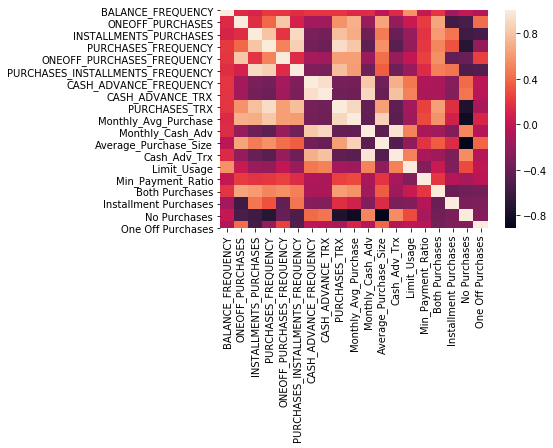

In [64]:
sns.heatmap(cr_dummy.corr())

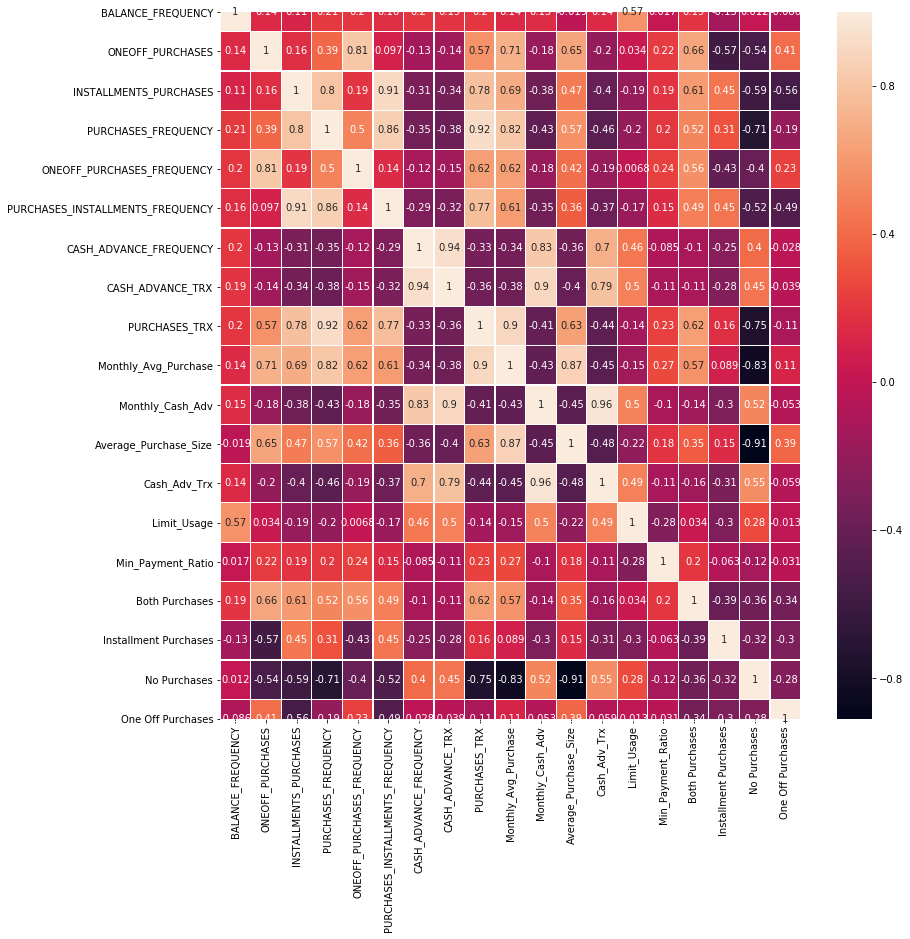

In [66]:
corr = cr_dummy.corr()
# Set the matplotlib figure 
fig, ax=plt.subplots(figsize=(13,13))
# Generate a custom diverging colormap
Cmap=sns.diverging_palette(130,10,as_cmap=True)

# Draw the heatmap
Heatmap= sns.heatmap(corr, annot=True, ax=ax,  linewidths=0.2)

#### Some of the features are co-related therefore, applying Dimensionality reduction will reduce multi collinearity in data

In [72]:
cr_dummy = cr_dummy.drop(['Purchase_Type'], axis = 1)
#cr_dummy.head()

In [73]:
#We do Standardization so that all data is on same scale. Centering and Scaling will make all features of equal weight.
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy) #.iloc[:,0:15]

## Applying Principal Component Analysis (PCA)

In [74]:
cr_dummy.shape

(8950, 19)

In [78]:
cr_scaled.shape

(8950, 19)

In [76]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [77]:
#We have 15 features so our n_component will be 15.
pc=PCA(n_components=5)
p=pc.fit(cr_scaled)

In [79]:
p.explained_variance_

array([7.82067699, 3.41557506, 2.66782177, 1.37330979, 1.18649718])

In [80]:
var_ratio

{4: 0.8039829812031297,
 5: 0.8664232238655876,
 6: 0.9115715632961419,
 7: 0.9374002419061468,
 8: 0.9566716618876726,
 9: 0.970867879146606,
 10: 0.9823014353995413,
 11: 0.9884830177949819,
 12: 0.992153638124739,
 13: 0.9949121370450184,
 14: 0.9972697210443237}

In [81]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9972697210443237

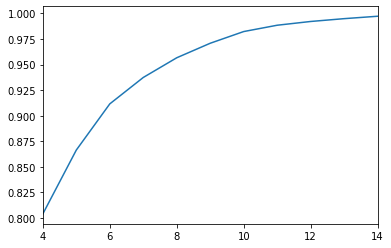

In [82]:
pd.Series(var_ratio).plot()

#### Since 5 components are showing close to 90% variance we select 5 components

In [83]:
pc_final=PCA(n_components=5).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [84]:
dd=pd.DataFrame(reduced_cr)

In [87]:
print(dd.shape)

(8950, 5)


In [88]:
col_list=cr_dummy.columns

In [468]:
cr_dummy_1.shape

(8950, 17)

In [90]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_Cash_Adv', 'Average_Purchase_Size', 'Cash_Adv_Trx',
       'Limit_Usage', 'Min_Payment_Ratio', 'Both Purchases',
       'Installment Purchases', 'No Purchases', 'One Off Purchases'],
      dtype='object')

In [91]:
dd.head()

,0,1,2,3,4
0,-0.221919,-2.864567,0.003280,0.531360,-0.179968
1,4.657689,0.328235,-0.659316,-0.904389,0.265255
2,-1.665416,0.932661,3.034555,0.585728,-1.459585
3,0.706333,0.502165,2.981220,2.669037,-0.834640
4,0.975022,-0.890972,2.525724,0.325704,-1.549827


In [92]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,-0.014480,0.266496,-0.179901,0.089565,-0.526647
ONEOFF_PURCHASES,-0.200353,0.351726,0.289624,-0.085712,0.011495
INSTALLMENTS_PURCHASES,-0.277712,-0.007690,-0.359798,-0.018565,0.069116
PURCHASES_FREQUENCY,-0.311904,0.072219,-0.192417,0.079862,0.001906
ONEOFF_PURCHASES_FREQUENCY,-0.191351,0.319165,0.191235,-0.170693,-0.023541
PURCHASES_INSTALLMENTS_FREQUENCY,-0.259740,-0.020957,-0.376599,0.016588,0.016884
CASH_ADVANCE_FREQUENCY,0.215249,0.293832,-0.160945,0.198713,0.250185
CASH_ADVANCE_TRX,0.232090,0.303284,-0.168668,0.186799,0.242732
PURCHASES_TRX,-0.320918,0.147031,-0.118361,0.049024,0.015909
Monthly_Avg_Purchase,-0.323385,0.165009,0.023174,0.150542,0.074063


In [93]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.411569
PC_1    0.179747
PC_2    0.140396
PC_3    0.072271
PC_4    0.062440
dtype: float64

In [94]:
type(cr_pca)

sklearn.decomposition.pca.PCA

# CLUSTERING
## Let's start with 4 clusters as we made 4 segments based on purcases of customers

In [95]:
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)
km_4.labels_

array([0, 3, 1, ..., 0, 3, 1])

In [96]:
pd.Series(km_4.labels_).value_counts()

2    2747
0    2242
3    2085
1    1876
dtype: int64

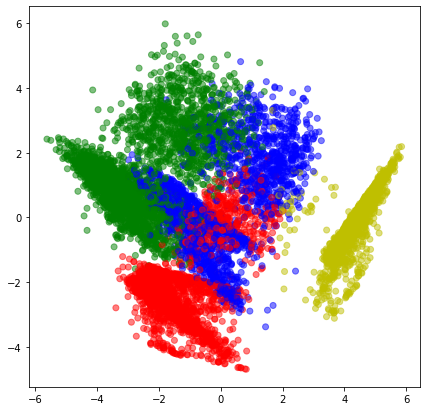

In [97]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [98]:
cr_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
Monthly_Avg_Purchase                float64
Monthly_Cash_Adv                    float64
Average_Purchase_Size               float64
Cash_Adv_Trx                        float64
Limit_Usage                         float64
Min_Payment_Ratio                   float64
Both Purchases                        uint8
Installment Purchases                 uint8
No Purchases                          uint8
One Off Purchases                     uint8
dtype: object

In [100]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [101]:
df_pair_plot['Cluster']=km_4.labels_

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


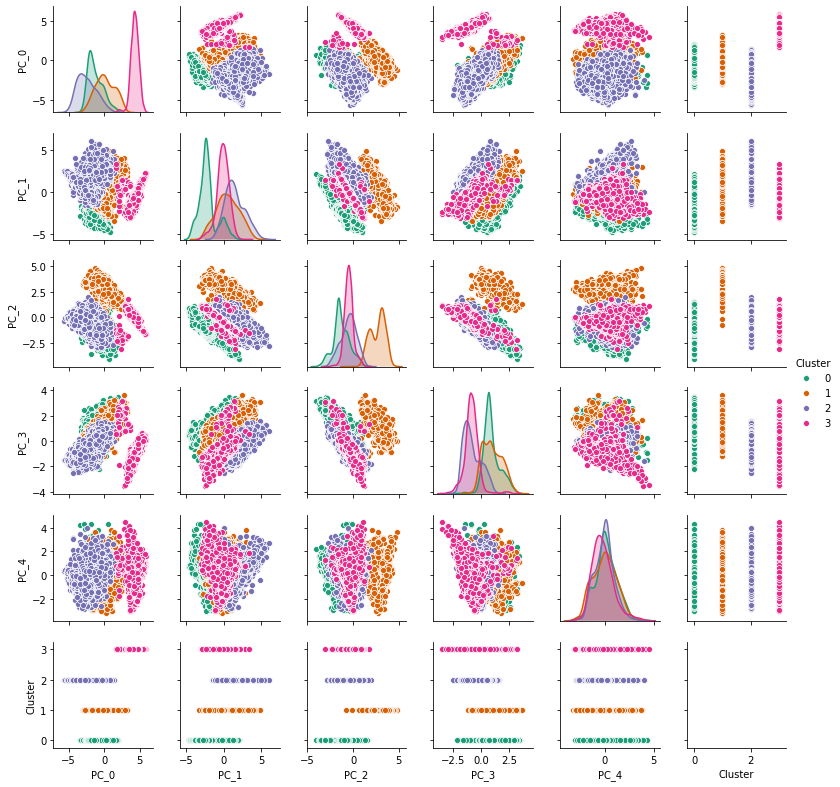

In [102]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [103]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_Avg_Purchase','Monthly_Cash_Adv','Limit_Usage','Cash_Adv_Trx',
         'Min_Payment_Ratio','Both Purchases', 'Installment Purchases', 'No Purchases',
       'One Off Purchases','CREDIT_LIMIT']

In [105]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([df_credit_card,pd.get_dummies(df_credit_card['Purchase_Type'])],axis=1)

In [106]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [107]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Adv,Limit_Usage,Cash_Adv_Trx,Min_Payment_Ratio,Both Purchases,Installment Purchases,No Purchases,One Off Purchases,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,4.090075,0.000000,144.650844,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,45.749535,1610.736371,382.624146,0,0,1,0,7000.0,3
2,12,64.430833,0.000000,33.268651,0.000000,99.168154,0,0,0,1,7500.0,1
3,1,124.916667,17.149001,22.222274,205.788017,0.000000,0,0,0,1,7500.0,1
4,1,1.333333,0.000000,68.142861,0.000000,277.107453,0,0,0,1,1200.0,1


In [108]:
# Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.010705,7.119936,33.231525,0.038849
Monthly_Avg_Purchase,47.459586,69.773045,194.312417,0.092549
Monthly_Cash_Adv,33.278237,78.222243,67.996079,186.193281
Limit_Usage,26.402050,37.937299,35.610618,57.488976
Cash_Adv_Trx,94.482727,162.355349,128.738000,479.447770
Min_Payment_Ratio,1330.289847,548.061787,728.973865,994.812047
Both Purchases,0.007136,0.004797,1.000000,0.000959
Installment Purchases,0.992864,0.000000,0.000000,0.016307
No Purchases,0.000000,0.000000,0.000000,0.979376
One Off Purchases,0.000000,0.995203,0.000000,0.003357


In [111]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')


Cluster_4   
0          0    2242
1          1    1876
2          2    2747
3          3    2085
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2242   25.050279
1  1876   20.960894
2  2747   30.692737
3  2085   23.296089 



# Insights for 4 Clusters 

### Cluster 0:
#### In first cluster customers are utilizing lowest credit limit amongst other clusters and are mostly transacting in installment purchases

### Cluster 1:
#### These set of customers are mostly doing one off purchases followed with cash advance transactions

### Cluster 2:
#### These set of customers are doing maximum average purchases and are utilizing maximum credit limit. Basically this are our high spending customers and are involved in both type of transactions one off and installments

### Cluster 3:
#### These customers are making cash advance transactions mostly and are not transacting much in other metods we can give them low interest offers in order increase our revenue in future


## Finding behaviour with 5 Clusters:

In [112]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [113]:
pd.Series(km_5.labels_).value_counts()

2    2062
1    1936
3    1871
0    1848
4    1233
dtype: int64

Text(0, 0.5, 'PC_1')

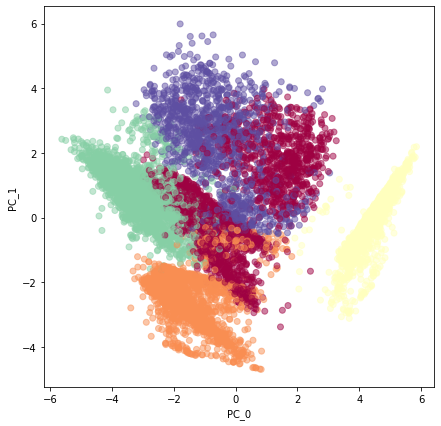

In [114]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [115]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [116]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.040043,11.662190,0.011639,35.071619,24.673155
Monthly_Avg_Purchase,68.777070,46.400628,0.010987,213.213569,126.026695
Monthly_Cash_Adv,71.652839,2.762296,184.076723,1.146893,224.556904
Limit_Usage,37.745924,20.305900,57.370278,25.848836,58.656346
Cash_Adv_Trx,161.120669,22.612952,481.677662,11.995403,415.659681
Min_Payment_Ratio,546.108371,1492.271458,1001.547596,868.600452,404.509062
Both Purchases,0.002706,0.005165,0.000000,1.000000,0.720195
Installment Purchases,0.000000,0.994835,0.006305,0.000000,0.260341
No Purchases,0.000000,0.000000,0.990301,0.000000,0.000000
One Off Purchases,0.997294,0.000000,0.003395,0.000000,0.019465


In [117]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print ('\n',s1)


 Cluster_5   
0          0    1848
1          1    1936
2          2    2062
3          3    1871
4          4    1233
Name: Cluster_5, dtype: int64


In [118]:
# percentage of each cluster
print ("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5 

   Size  Percentage
0  1848   20.648045
1  1936   21.631285
2  2062   23.039106
3  1871   20.905028
4  1233   13.776536


# Insights for 5 Clusters 

### Cluster 0:
#### Customers are mostly making One off purchases and no installment purchases

### Cluster 1:
#### These set of customers are making installment purchases and making minimum payments towards the complete payment in billing cycle

### Cluster 2:
#### These customers are doing Cash advance transactions and are not transacting much in other categories

### Cluster 3:
#### These customers are highest in doing average monthly transactions and are using maximum credit limit among other groups

### Cluster 4:
#### These set of customers are doing both transactions and cash advances we can say this cluster might be a combination of cluster 2 and cluster 3.


# Find Behavior with 6 clusters

In [119]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 1, 3, ..., 2, 1, 4])

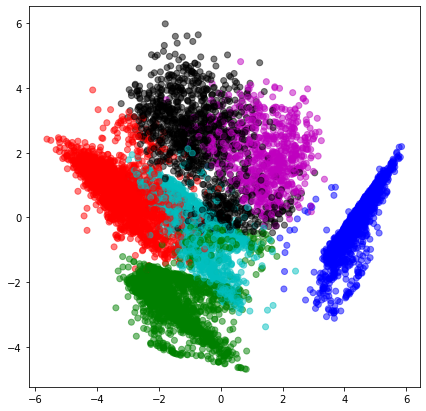

In [120]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [121]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [122]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,35.157243,0.010199,11.667702,7.704947,6.187003,25.013158
Monthly_Avg_Purchase,214.014728,0.010841,46.451087,77.053665,58.048232,125.891044
Monthly_Cash_Adv,0.993756,184.075110,2.838324,0.600081,193.804104,216.452031
Limit_Usage,25.845650,57.356047,20.394732,24.835436,57.272478,58.601478
Cash_Adv_Trx,10.198333,481.609905,23.028362,5.796114,396.885060,418.441090
Min_Payment_Ratio,872.867674,1002.330220,1494.884319,638.839165,408.135710,397.712266
Both Purchases,1.000000,0.000000,0.002588,0.014134,0.000000,0.736842
Installment Purchases,0.000000,0.006314,0.997412,0.000000,0.000000,0.263158
No Purchases,0.000000,0.991744,0.000000,0.000000,0.000000,0.000000
One Off Purchases,0.000000,0.001943,0.000000,0.985866,1.000000,0.000000


# Insights for 6 Clusters 

### Cluster 0:
#### Customers in first cluster are making both type (One off & Installment) payments

### Cluster 1:
#### These set of customers are making no purchases but making cash advances

### Cluster 2:
#### These customers are lowest in terms of credit limit utilization and most of the payments are installment purchases

### Cluster 3:
#### These customers are similar to cluster 0 and makes all types of payments in less propotion compared to cluster 0.

### Cluster 4:
#### These set of customers are doing One off Purchases and cash advances on a larger scale.

### Cluster 5:
#### These customers are making cash advance followed with both type of transactions

## Checking performance metrics for Kmeans
### We will validate the performance with 2 metrics Calinski harabaz and Silhouette score

In [126]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=

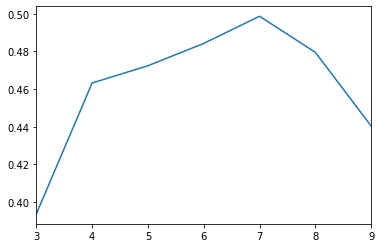

In [127]:
pd.Series(score).plot()

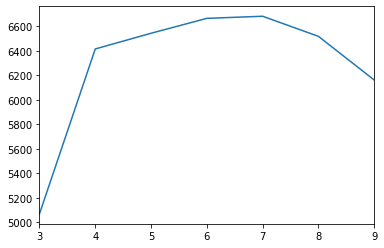

In [128]:
pd.Series(score_c).plot()

# Different Way of Doing

In [148]:
cluster_range = range(1,20)
cluster_errors = []

In [149]:
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)

In [150]:
#Create Data Frame with Cluster errors
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})

In [151]:
clusters_df

,num_clusters,cluster_errors
0,1,147335.269218
1,2,92249.916246
2,3,69080.186993
3,4,46750.574591
4,5,37524.174749
5,6,31171.826294
6,7,26866.870964
7,8,24141.063230
8,9,22113.970483
9,10,20439.243453


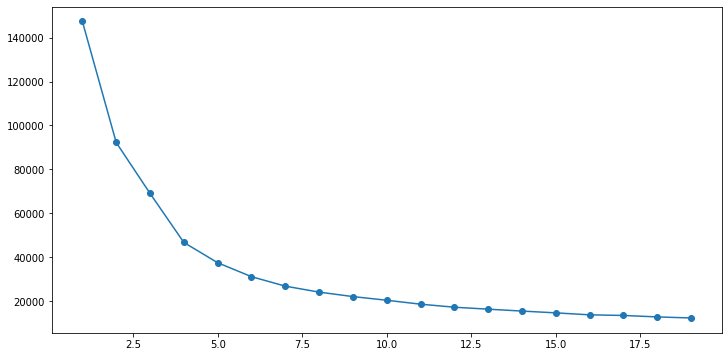

In [152]:
# Plot line chart to visulaize number of clusters
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [153]:
#Implement KMeans
kMeans_model = KMeans(n_clusters = 5).fit(reduced_cr)

In [ ]:
#Summarize Output
pd.crosstab()

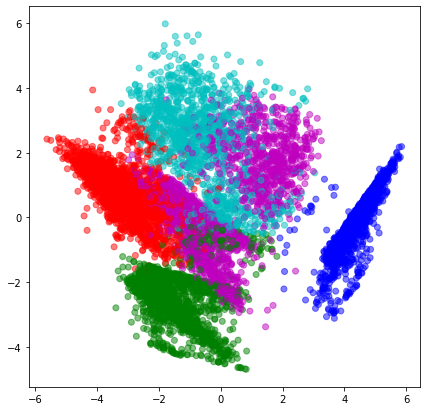

In [154]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m'}
label_color=[color_map[l] for l in kMeans_model.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [160]:
cluster_df_5_v1=pd.concat([cre_original[col_kpi],pd.Series(kMeans_model.labels_,name='Cluster_5')],axis=1)

In [161]:
five_cluster_v1=cluster_df_5_v1.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T
five_cluster_v1

Cluster_5,0,1,2,3,4
PURCHASES_TRX,35.071619,0.011639,11.662190,24.673155,7.040043
Monthly_Avg_Purchase,213.213569,0.010987,46.400628,126.026695,68.777070
Monthly_Cash_Adv,1.146893,184.076723,2.762296,224.556904,71.652839
Limit_Usage,25.848836,57.370278,20.305900,58.656346,37.745924
Cash_Adv_Trx,11.995403,481.677662,22.612952,415.659681,161.120669
Min_Payment_Ratio,868.600452,1001.547596,1492.271458,404.509062,546.108371
Both Purchases,1.000000,0.000000,0.005165,0.720195,0.002706
Installment Purchases,0.000000,0.006305,0.994835,0.260341,0.000000
No Purchases,0.000000,0.990301,0.000000,0.000000,0.000000
One Off Purchases,0.000000,0.003395,0.000000,0.019465,0.997294


# Conclusion

### As we can see in this dataset 4 clusters are optimum and below is the percent wise distribution of customers amongst clusters. 

## Insights for this set of customers are as follows:

### Cluster 0:
#### In first cluster customers are utilizing lowest credit limit amongst other clusters and are mostly transacting in installment purchases

### Cluster 1:
#### These set of customers are mostly doing one off purchases followed with cash advance transactions

### Cluster 2:
#### These set of customers are doing maximum average purchases and are utilizing maximum credit limit. Basically this are our high spending customers and are involved in both type of transactions one off and installments

### Cluster 3:
#### These customers are making cash advance transactions mostly and are not transacting much in other metods we can give them low interest offers in order increase our revenue in future